In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# import pandas as pd
# import nltk
# from nltk import FreqDist
# from nltk.corpus import stopwords
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import pdb


# df = pd.read_excel('/content/Strengths and Weaknesses.xlsx')


# def preprocess_text(text):
#     tokens = nltk.word_tokenize(text)
#     words = [word.lower() for word in tokens if word.isalpha()]
#     stop_words = set(stopwords.words("english"))
#     filtered_words = [word for word in words if word not in stop_words]
#     return ' '.join(filtered_words)


# df['Strengths'] = df["What are Cotopaxi's top 3 strengths?"].apply(preprocess_text)
# df['Opportunities'] = df["What are Cotopaxi's top 3 areas of opportunity?"].apply(preprocess_text)


# print(df['Strengths'])

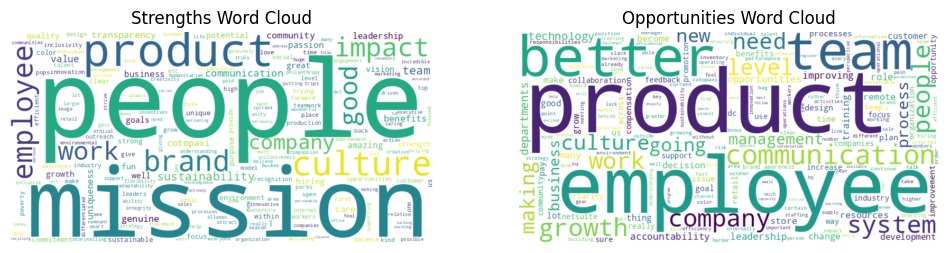

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('/content/Strengths and Weaknesses.xlsx')

# Define a function to preprocess the text
def preprocess_text(text):
    # Check if the input is a string, and if not, return an empty string
    if not isinstance(text, str):
        return ''

    tokens = nltk.word_tokenize(text)
    words = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the preprocessing to the Strengths and Opportunities columns
df['Strengths'] = df["What are Cotopaxi's top 3 strengths?"].apply(preprocess_text)
df['Opportunities'] = df["What are Cotopaxi's top 3 areas of opportunity?"].apply(preprocess_text)

# Combine all Strengths and Opportunities into a single string
all_strengths = ' '.join(df['Strengths'])
all_opportunities = ' '.join(df['Opportunities'])

# Create WordCloud for Strengths
strengths_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_strengths)

# Create WordCloud for Opportunities
opportunities_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_opportunities)

# Plot and display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(strengths_wordcloud, interpolation='bilinear')
plt.title("Strengths Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opportunities_wordcloud, interpolation='bilinear')
plt.title("Opportunities Word Cloud")
plt.axis('off')

plt.show()
